In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


In [155]:
data_dir = './agg_data/'
df = pd.read_csv(f'{data_dir}aggregated_data.csv')
df.head() 

,Country,DataType,AreaID,StartTime,EndTime,PsrType,total
0,DE,gen,10Y1001A1001A83F,2021-12-31 23:00:00,2022-01-01 00:00:00,B01,4333
1,DE,gen,10Y1001A1001A83F,2022-01-01 00:00:00,2022-01-01 00:15:00,B01,17295
2,DE,gen,10Y1001A1001A83F,2022-01-01 01:00:00,2022-01-01 01:15:00,B01,17322
3,DE,gen,10Y1001A1001A83F,2022-01-01 02:00:00,2022-01-01 02:15:00,B01,17343
4,DE,gen,10Y1001A1001A83F,2022-01-01 03:00:00,2022-01-01 03:15:00,B01,17354


Check missing values

In [156]:
#count the total nans in each column and the total length of the data.
df.isnull().sum(), len(df)

(Country      0
 DataType     0
 AreaID       0
 StartTime    0
 EndTime      0
 PsrType      0
 total        0
 dtype: int64,
 357782)

Check the date types

In [157]:
df['StartTime'].dtypes

dtype('O')

In [158]:
df['StartTime'] = pd.to_datetime(df['StartTime'])
df['EndTime'] = pd.to_datetime(df['EndTime'])

Check again the types

In [159]:
df['StartTime'].dtypes
df['EndTime'].dtypes

dtype('<M8[ns]')

In [160]:
df['DataType'].unique()

array(['gen', 'load'], dtype=object)

Let's transform the DataType to binary column

In [161]:
df['isLoad'] = df['DataType'].apply(lambda x: 0 if x == 'gen' else 1)


Check the areas value range

In [162]:
df.groupby(['Country', 'AreaID']).size()

Country  AreaID          
DE       10Y1001A1001A83F    56905
DK       10Y1001A1001A65H    27475
HU       10YHU-MAVIR----U    51310
IT       10YIT-GRTN-----B    48692
NE       10YNL----------L    33175
PO       10YPL-AREA-----S    40416
SE       10YSE-1--------K    21209
SP       10YES-REE------0    68946
UK       10Y1001A1001A92E     9654
dtype: int64

Since the Areas are reflective of their country we can safely delete this field

In [163]:
df = df.drop('AreaID', axis=1)
# df = df.drop('DataType', axis=1)

In [ ]:
df['country'] = df['country'].replace('NE', 'NL')

In [164]:
df.to_csv('./processed_data/processed_data.csv', index=False)

In [133]:
df.head()

,Country,StartTime,EndTime,PsrType,total,isLoad
0,DE,2021-12-31 23:00:00,2022-01-01 00:00:00,B01,4333,0
1,DE,2022-01-01 00:00:00,2022-01-01 00:15:00,B01,17295,0
2,DE,2022-01-01 01:00:00,2022-01-01 01:15:00,B01,17322,0
3,DE,2022-01-01 02:00:00,2022-01-01 02:15:00,B01,17343,0
4,DE,2022-01-01 03:00:00,2022-01-01 03:15:00,B01,17354,0


In [134]:
df['PsrType'].unique()

array(['B01', 'B02', 'B04', 'B05', 'B06', 'B09', 'B10', 'B11', 'B12',
       'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'LOAD', 'B03',
       'B13', 'B07', 'B08'], dtype=object)

Let assess load and gen data individually

In [135]:
# Split the DataFrame into two based on 'isLoad' column
df_load = df[df['isLoad'] == 1]
df_gen = df[df['isLoad'] == 0]

Lets plot the distribution of Columns one by one

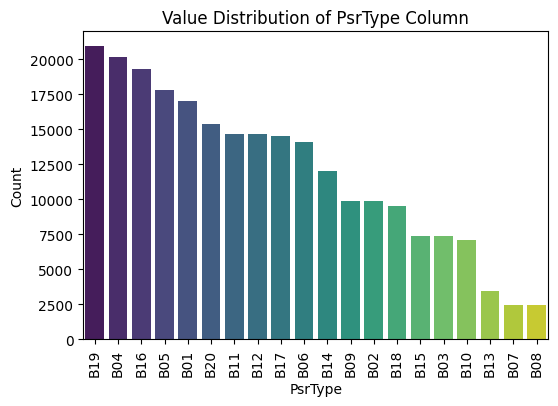

In [136]:
# Get the value counts of the 'PsrType' column
value_counts = df_gen['PsrType'].value_counts()

# Create a bar plot of the value counts
plt.figure(figsize=(6, 4))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('PsrType')
plt.ylabel('Count')
plt.title('Value Distribution of PsrType Column')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

## Generation of Energy by Country

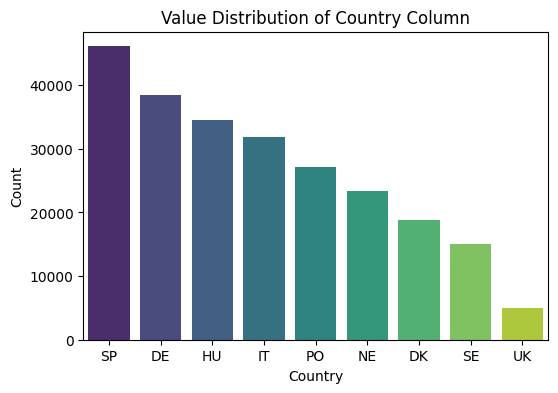

In [137]:
# Get the value counts of the 'Country' column
value_counts = df_gen['Country'].value_counts()

# Create a bar plot of the value counts
plt.figure(figsize=(6, 4))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Value Distribution of Country Column')


# Show the plot
plt.show()

## Consumption of Energy by countries

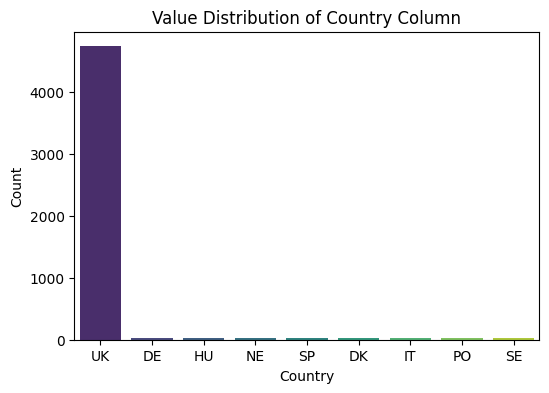

In [138]:
# Get the value counts of the 'Country' column
value_counts = df_load['Country'].value_counts()

# Create a bar plot of the value counts
plt.figure(figsize=(6, 4))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Value Distribution of Country Column')


# Show the plot
plt.show()

In [139]:
df.head()

,Country,StartTime,EndTime,PsrType,total,isLoad
0,DE,2021-12-31 23:00:00,2022-01-01 00:00:00,B01,4333,0
1,DE,2022-01-01 00:00:00,2022-01-01 00:15:00,B01,17295,0
2,DE,2022-01-01 01:00:00,2022-01-01 01:15:00,B01,17322,0
3,DE,2022-01-01 02:00:00,2022-01-01 02:15:00,B01,17343,0
4,DE,2022-01-01 03:00:00,2022-01-01 03:15:00,B01,17354,0


In [151]:
date = pd.to_datetime('2022-01-13')  # replace with your date
filtered_df = df_gen[(df_gen['StartTime'].dt.date == date.date()) & (df_gen['Country'] == 'NE') & (df_gen['PsrType'] == 'B01')]
print(len(filtered_df))
filtered_df

24


,Country,StartTime,EndTime,PsrType,total,isLoad
124052,NE,2022-01-13 00:00:00,2022-01-13 00:15:00,B01,41,0
124053,NE,2022-01-13 01:00:00,2022-01-13 01:15:00,B01,42,0
124054,NE,2022-01-13 02:00:00,2022-01-13 02:15:00,B01,40,0
124055,NE,2022-01-13 03:00:00,2022-01-13 03:15:00,B01,42,0
124056,NE,2022-01-13 04:00:00,2022-01-13 04:15:00,B01,44,0
124057,NE,2022-01-13 05:00:00,2022-01-13 05:15:00,B01,43,0
124058,NE,2022-01-13 06:00:00,2022-01-13 06:15:00,B01,43,0
124059,NE,2022-01-13 07:00:00,2022-01-13 07:15:00,B01,43,0
124060,NE,2022-01-13 08:00:00,2022-01-13 08:15:00,B01,41,0
124061,NE,2022-01-13 09:00:00,2022-01-13 09:15:00,B01,41,0


In [144]:
df_gen[df_gen['PsrType'] == 'B01'].StartTime.value_counts()

2021-12-31 23:00:00    7
2022-03-05 16:00:00    7
2022-03-06 12:00:00    7
2022-03-06 13:00:00    7
2022-03-06 14:00:00    7
                      ..
2022-04-14 03:00:00    1
2022-04-14 02:00:00    1
2022-04-14 01:00:00    1
2022-04-14 00:00:00    1
2022-04-16 23:00:00    1
Name: StartTime, Length: 2570, dtype: int64

C:\Users\Mirwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


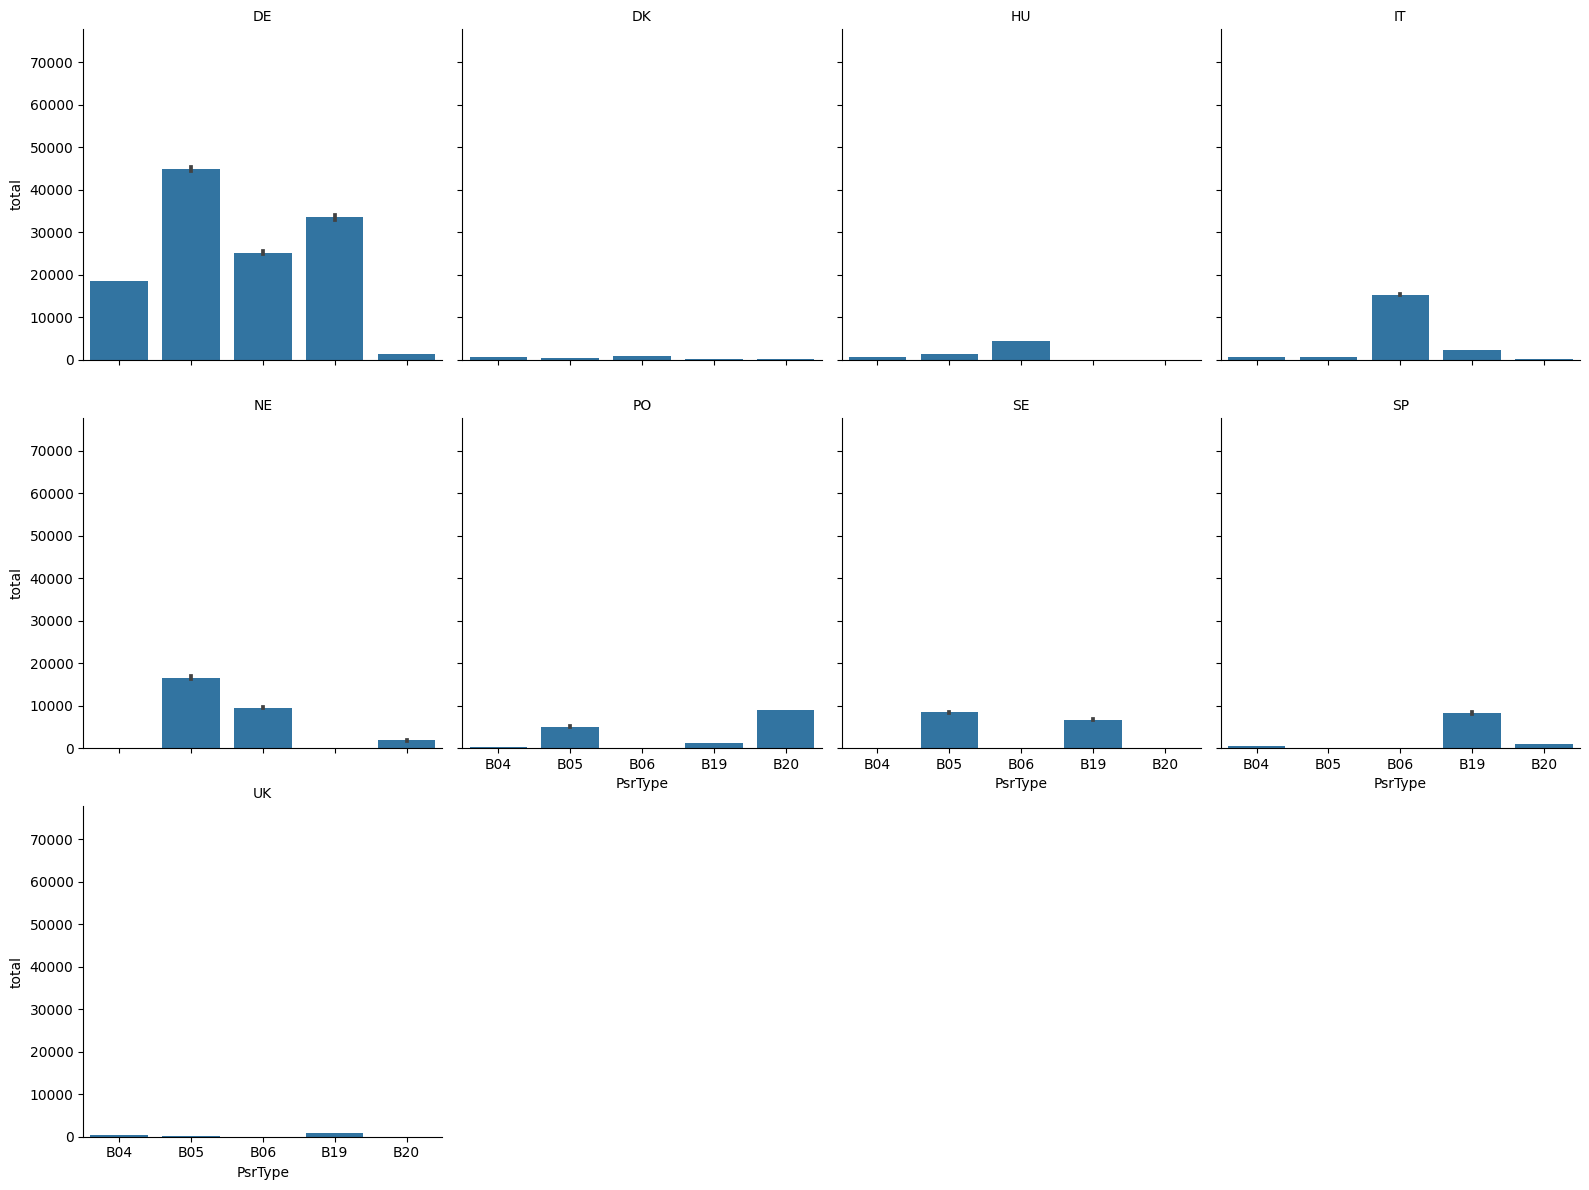

In [153]:
# Create a FacetGrid object
g = sns.FacetGrid(df_gen, col="Country", col_wrap=4, height=4, aspect=1)

# Map a bar plot to each facet
g.map(sns.barplot, "PsrType", "total")

# Add a title to each facet
g.set_titles("{col_name}")

# Show the plot
plt.show()